# Lead Scoring Case Study.

#### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.  its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. 

#### Buisness Goal:

X Education wants to identify the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Steps in brief:

1. Read and understanding data.
2. Data visualizations and cleaning.
3. Data preparation - convert to desired format for analysis (E.g: Dummy variables, binning .etc).
4. Modelling
5. Model validation to match desired results.

## Step 1: Reading and Understanding the Data

Import required libraries.

In [122]:
import pandas as pd
import numpy  as np

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

# Importing sklearn.
from sklearn.model_selection   import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
# import data.

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [124]:
# Let's check the dimensions of the dataframe.

df.shape

(9240, 37)

In [125]:
# let's look at the statistical aspects of the dataframe

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [126]:
# Let's see the type and info of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [127]:
# Observe the features(columns) and analyse which can be dropped at later point.
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Step 2: Data visualizations and cleaning.

#### Remove unwanted columns - Columns which has least impact on target variable.

We shall remove columns which doesn't have any impact on our target variable. Here we are least bothered about the country or city of the browsers, so we shall drop them.

#### Update 'Select' values in data frame.

We will replace all 'Select' values present in data to nan values as described in problem statement.

#### Identifying Missing Values

The methods ```isnull()``` and ```notnull()``` are the most common ways of identifying missing values. 

While handling missing data, we first need to identify the rows and columns containing missing values, count the number of missing values, and then decide how to treat them.

It is important that to **treat missing values in each column separately**, rather than implementing a single solution (e.g. replacing NaNs by the mean of a column) for all columns.

In [128]:
# Drop Country and City column.

df.drop(['Country', 'City'], axis=1, inplace=True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Select,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Select,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value - as stated in problem statement we will convert then to NaN and can be treated.

In [129]:
# 'Select' level must be replaced to nan values.

df = df.replace('Select', np.nan)

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,NaN,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,NaN,02.Medium,01.High,15.0,18.0,No,No,Modified


In [130]:
# summing up the missing values (column-wise)

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [131]:
# percentage missing values.

(df.isnull().sum()/len(df)) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

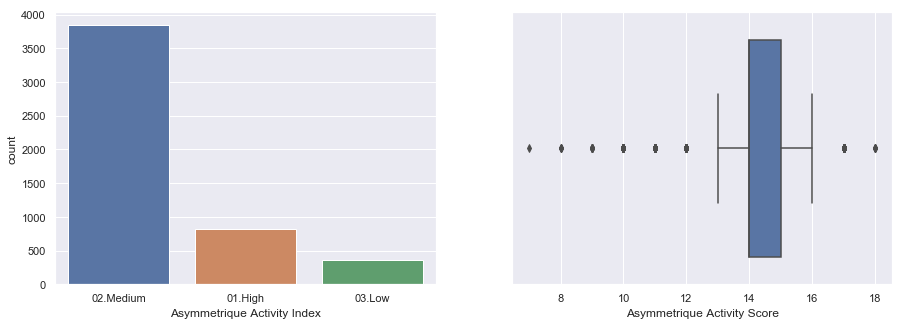

In [132]:
# Plot and check distribution of variables.

fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(df['Asymmetrique Activity Index'], ax = axs[0])
plt2 = sns.boxplot(df['Asymmetrique Activity Score'],   ax = axs[1])

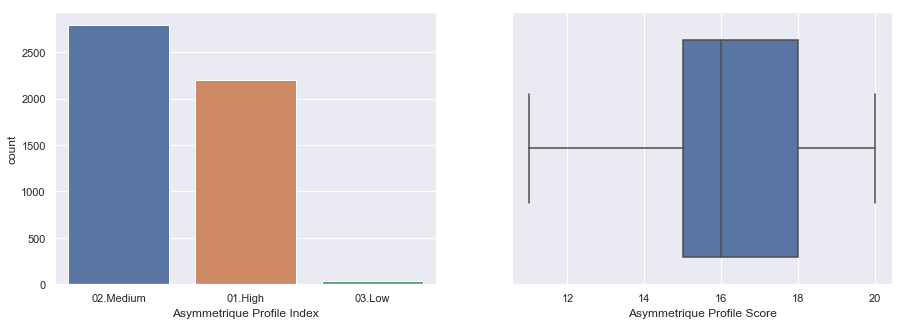

In [133]:
# Plot and check distribution of variables.

fig, axs = plt.subplots(1,2, figsize = (15,5))
plt3 = sns.countplot(df['Asymmetrique Profile Index'], ax = axs[0])
plt4 = sns.boxplot(df['Asymmetrique Profile Score'],   ax = axs[1])

In [134]:
# We shall drop columns having very high variation, if imputed it will cause biased imputation.
# So we shall consider Asymmetrique Activity and Asymmetrique Profile and Lead Quality. since it has no
# much significance on our target variable.

df.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Lead Quality','Asymmetrique Activity Score', 
         'Asymmetrique Profile Score'], axis=1, inplace=True)
df.shape

(9240, 30)

In [135]:
# Again check percentage missing values.

(df.isnull().sum()/len(df)) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

### We will look at visualizations on variables and decice imputation on that.

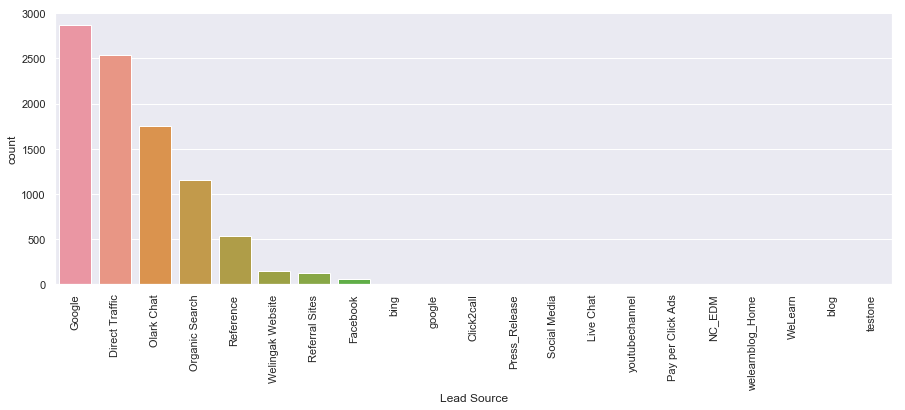

In [136]:
# Lead Source
fig, axs = plt.subplots(figsize = (15,5))

# We shall impute 'Google' for Lead score since it has the highest frquency.
plot_ax = sns.countplot(df['Lead Source'], order = df['Lead Source'].value_counts().index)
plot_ax.set_xticklabels(plot_ax.get_xticklabels(), rotation=90)

df['Lead Source'].fillna((df['Lead Source'].mode().iloc[0]), inplace=True)

In [137]:
# TotalVisits.

# Apart form max-seems to be an outlier other values seems to have no 
# major diferences so we will impute with mean value.

print(df['TotalVisits'].describe())

df['TotalVisits'].fillna(df['TotalVisits'].mean(), inplace=True)

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


In [138]:
# Page Views Per Visit.

# We have no major variation in data, so we will impute with mean value.

print(df['Page Views Per Visit'].describe())

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean(), inplace=True)

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64


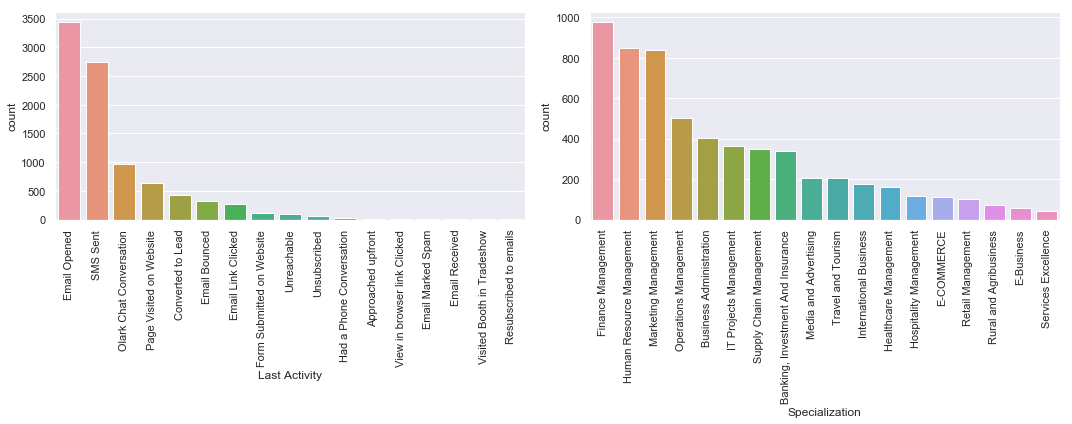

In [139]:

# Similarly we shall fill highest occuring values for remaining categorical varaibles.
fig, axs = plt.subplots(1,2, figsize = (15,6))

plt1 = sns.countplot(df['Last Activity'],  ax = axs[0], order = df['Last Activity'].value_counts().index)
plt2 = sns.countplot(df['Specialization'], ax = axs[1], order = df['Specialization'].value_counts().index)

plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=90)

plt.tight_layout()

# After observation impute nan values with highest occuring values in each variable.
df['Last Activity'].fillna((df['Last Activity'].mode().iloc[0]), inplace=True)
df['Specialization'].fillna((df['Specialization'].mode().iloc[0]), inplace=True)

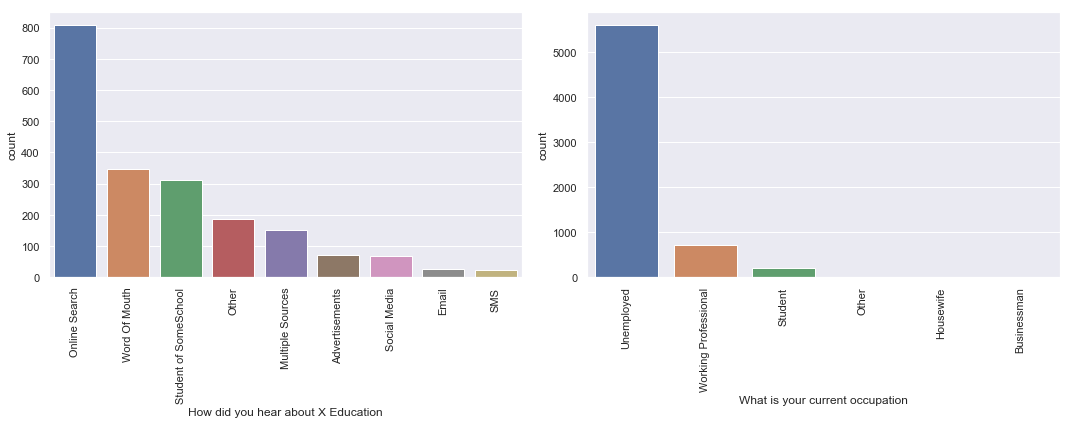

In [140]:
fig, axs = plt.subplots(1,2, figsize = (15,6))

plt3 = sns.countplot(df['How did you hear about X Education'], ax = axs[0], order = df['How did you hear about X Education'].value_counts().index)
plt4 = sns.countplot(df['What is your current occupation'], ax = axs[1], order = df['What is your current occupation'].value_counts().index)

plt3.set_xticklabels(plt3.get_xticklabels(), rotation=90)
plt4.set_xticklabels(plt4.get_xticklabels(), rotation=90)

plt.tight_layout()

# After observation impute nan values with highest occuring values in each variable.
df['How did you hear about X Education'].fillna((df['How did you hear about X Education'].mode().iloc[0]), inplace=True)
df['What is your current occupation'].fillna((df['What is your current occupation'].mode().iloc[0]), inplace=True)

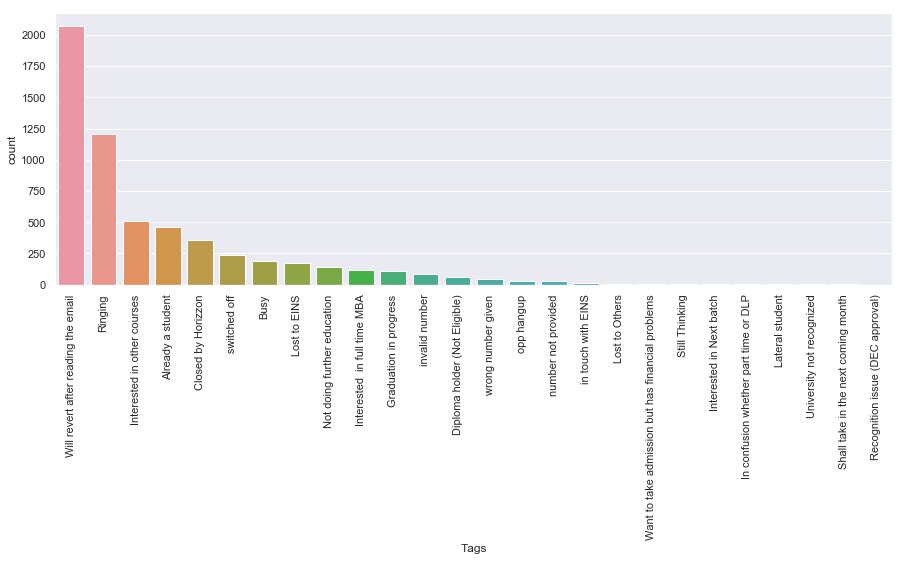

In [141]:
# Tags.
fig, axs = plt.subplots(figsize = (15,5))

plot_ax = sns.countplot(df['Tags'], order = df['Tags'].value_counts().index)
plot_ax.set_xticklabels(plot_ax.get_xticklabels(), rotation=90)


# After observation impute nan values with highest occuring.
df['Tags'].fillna((df['Tags'].mode().iloc[0]), inplace=True)

In [142]:
# From the above plot its clear that 'What matters most to you in choosing a course' 
# has very high Better Career Prospects so we will drop it.

# Better Career Prospects      9237
# Flexibility & Convenience       2
# Other                           1

df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

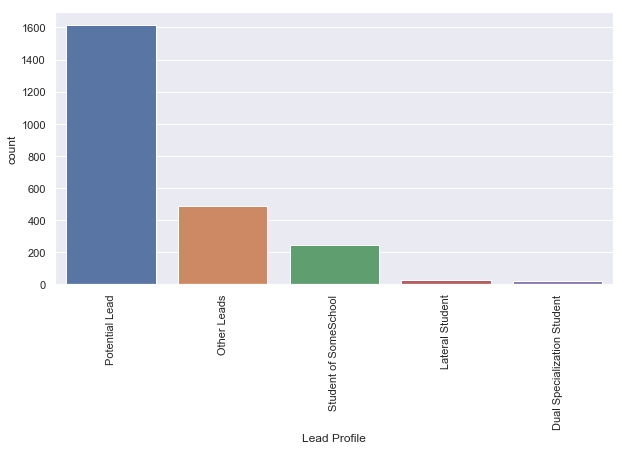

In [143]:
#Lead Profile.

fig, axs = plt.subplots(figsize = (10,5))

# We shall impute 'Google' for Lead score since it has the highest frquency.
plot_ax = sns.countplot(df['Lead Profile'], order = df['Lead Profile'].value_counts().index)
plot_ax.set_xticklabels(plot_ax.get_xticklabels(), rotation=90)

#Impute lead profile with highest occuring value - Google.
df['Lead Profile'].fillna((df['Lead Profile'].mode().iloc[0]), inplace=True)

In [144]:
# Again check percentage missing values.

(df.isnull().sum()/len(df)) * 100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
How did you hear about X Education          0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

#### As seen above data is imputed with sutable values and is now ready for Data visualizationa and preparation.

## Step 3: Data Preparation.

    1. Converting some binary variables (Yes/No) to 0/1
    2. Converting to Dummy variables.

In [145]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Potential Lead,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Potential Lead,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Potential Lead,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Potential Lead,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Potential Lead,No,No,Modified


In [146]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 
            'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 
            'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
            'Get updates on DM Content', 'I agree to pay the amount through cheque' ,
            'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)


In [147]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,Interested in other courses,0,0,Potential Lead,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,Ringing,0,0,Potential Lead,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,Ringing,0,0,Potential Lead,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,Will revert after reading the email,0,0,Potential Lead,0,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [148]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 
        'How did you hear about X Education', 'What is your current occupation', 'Tags', 'Lead Profile', 
        'Last Notable Activity']

dummy_val = pd.get_dummies(df[cols], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy_val], axis=1)

In [149]:
# Now drop original columns.

df.drop(cols, axis=1, inplace=True)

In [150]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0


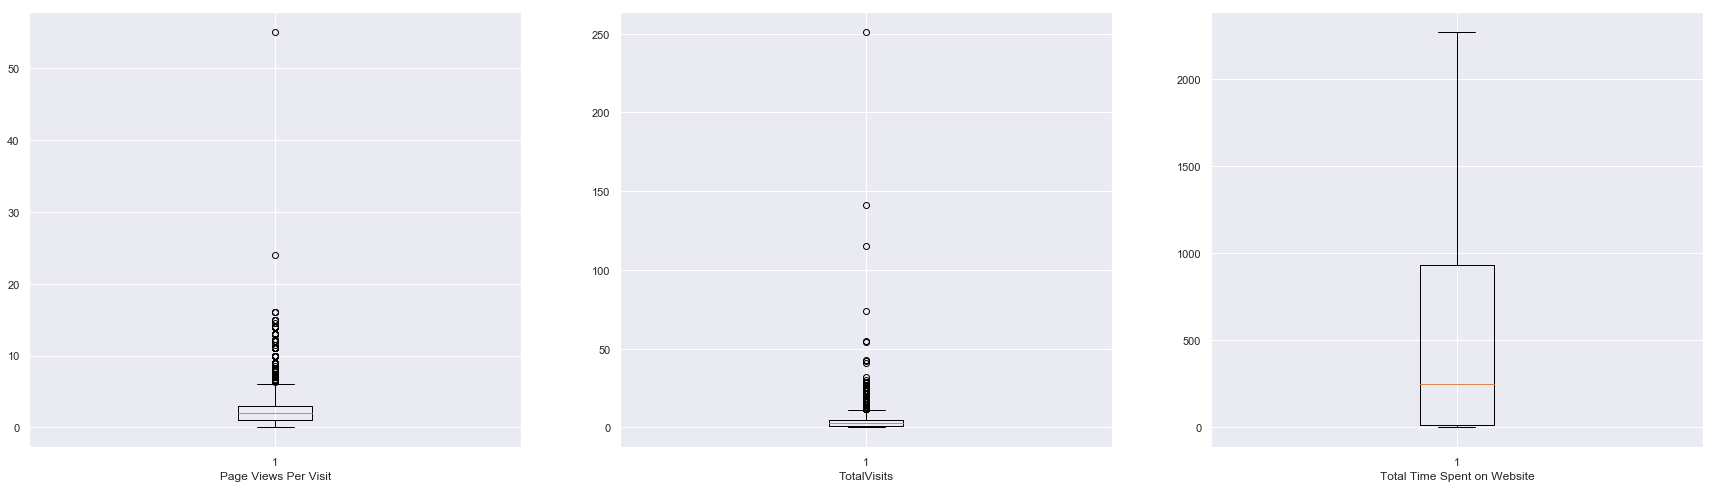

In [151]:
# Checking for outliers in the continuous variables

numeric_df = df[['Page Views Per Visit','TotalVisits', 'Total Time Spent on Website']]

fig, axes = plt.subplots(1,3,figsize=(30,8))
for index, column in enumerate(numeric_df.columns):
    ax = axes.flatten()[index]
    ax.boxplot(numeric_df[column])
    ax.set_xlabel(column)

In [152]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

df[['TotalVisits','Total Time Spent on Website']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website
count,9240.000000,9240.000000
mean,3.445238,487.698268
std,4.818723,548.021466
min,0.000000,0.000000
25%,1.000000,12.000000
50%,3.000000,248.000000
75%,5.000000,936.000000
90%,7.000000,1380.000000
95%,10.000000,1562.000000
99%,17.000000,1840.610000


From the above box plot and summary statistics its evident that "'TotalVisits'" has outliers and should be treated.

In [153]:
# Treat outliers.
Q3 = df.TotalVisits.quantile(0.95)

df = df[df['TotalVisits'] <= Q3]

In [154]:
# Treat outliers.
Q3 = df['Page Views Per Visit'].quantile(0.95)

df = df[df['Page Views Per Visit'] <= Q3]

In [155]:
df[['Page Views Per Visit','TotalVisits','Total Time Spent on Website']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Page Views Per Visit,TotalVisits,Total Time Spent on Website
count,8611.000000,8611.000000,8611.000000
mean,2.069839,2.756126,474.010219
std,1.637745,2.314777,544.887965
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,3.000000,235.000000
75%,3.000000,4.000000,904.000000
90%,4.000000,6.000000,1371.000000
95%,5.000000,7.000000,1553.000000
99%,6.000000,10.000000,1832.700000


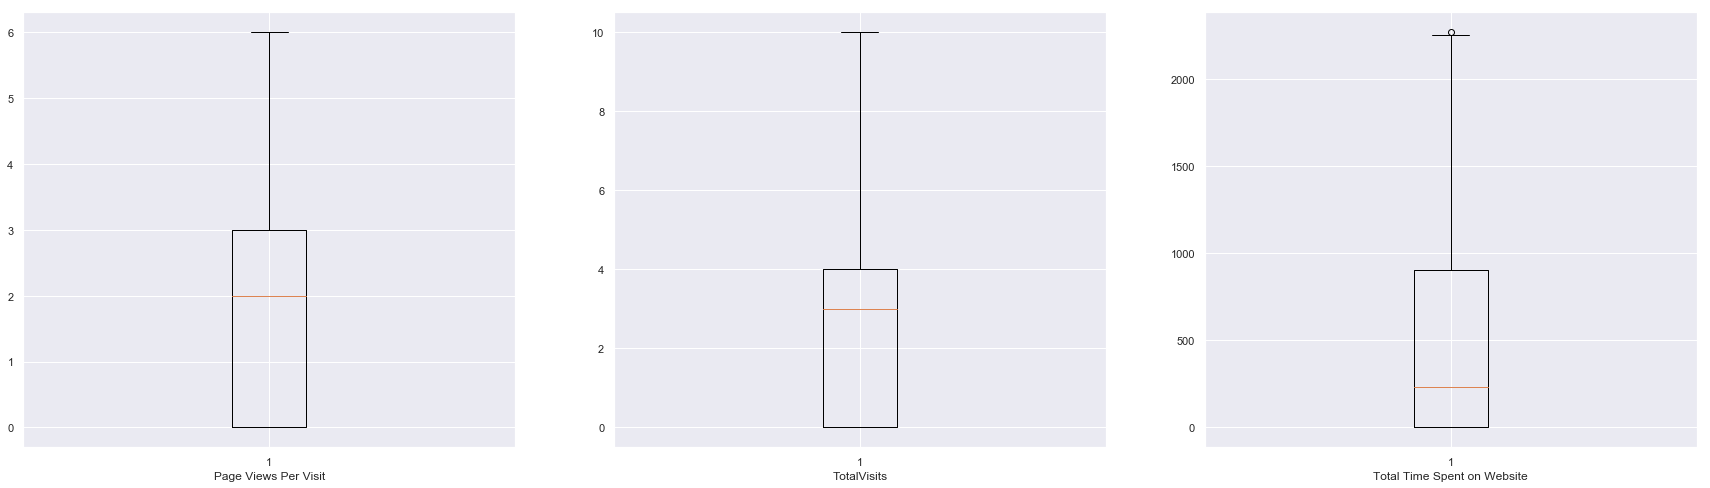

In [156]:
numeric_df = df[['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website']]

fig, axes = plt.subplots(1,3,figsize=(30,8))
for index, column in enumerate(numeric_df.columns):
    ax = axes.flatten()[index]
    ax.boxplot(numeric_df[column])
    ax.set_xlabel(column)

#### Now we have removed outliers and can proceed further analysis.

In [157]:
# Test-Train Split.

# Putting feature variable to X

X = df.drop(['Prospect ID','Lead Number', 'Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [158]:
# Putting response variable to y.

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [159]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
# Feature scaling.

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
532,0,0,0.102973,-0.442813,0.566337,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7273,0,0,1.830329,2.375255,-0.410747,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4998,0,0,-1.192545,-0.870128,-1.265696,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6668,0,0,0.102973,-0.247575,0.566337,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2917,0,0,-1.192545,-0.870128,-1.265696,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [162]:
### Checking the convereted Rate - current rate is 38%.
convereted = (sum(df['Converted'])/len(df['Converted'].index))*100
convereted

38.2185576588085

## Step 4: Model Building.


In [163]:
import statsmodels.api as sm

In [164]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     5912
Model Family:                Binomial   Df Model:                          114
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        14:29:48   Pearson chi2:                 3.48e+18
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     6.837e+15   6.99e+07   9.78e+07      0.000    6.84e+15    6.84e+15
Do Not Email                                             -4.007e+14   4.67e+06  -8.58e+07      0.000   -4.01e+14   -4.01e+14
Do Not Call                                                5.77e+15   6.78e+07   8.51e+07      0.000    5.77e+15    5.77e+15
TotalVisits                                                7.36e+13   1.49e+06   4.95e+07      0.000    7.36e+13    7.36e+13
Total Time Spent on Website                               1.406e+14   1.03e+06   1.37e+08      0.000    1.41e+14    1.41e+14
Page Views Per Visit                                     -9.992e+13   1.61e+06   -6.2e+07      0.000   -9.99e+13   -9.99e+13
Search                                                    1.899e+14   2.84e+07   6.68e+06      0.000     1.9e+14     1.9e+14
Magazine                                                    66.1867   7.25e-07   9.13e+07      0.000      66.187      66.187
Newspaper Article                                           74.2133   6.02e-07   1.23e+08      0.000      74.213      74.213
X Education Forums                                         -52.4749   8.77e-07  -5.98e+07      0.000     -52.475     -52.475
Newspaper                                                   54.3488   5.96e-07   9.13e+07      0.000      54.349      54.349
Digital Advertisement                                         1e+15   4.82e+07   2.07e+07      0.000       1e+15       1e+15
Through Recommendations                                   9.471e+14   4.01e+07   2.36e+07      0.000    9.47e+14    9.47e+14
Receive More Updates About Our Courses                     -64.8025   6.21e-07  -1.04e+08      0.000     -64.803     -64.803
Update me on Supply Chain Content                            1.9885    4.2e-07   4.74e+06      0.000       1.989       1.989
Get updates on DM Content                                   -4.5574   7.03e-07  -6.49e+06      0.000      -4.557      -4.557
I agree to pay the amount through cheque                    -9.4539   3.55e-07  -2.66e+07      0.000      -9.454      -9.454
A free copy of Mastering The Interview                     -1.8e+14      3e+06     -6e+07      0.000    -1.8e+14    -1.8e+14
Lead Origin_Landing Page Submission                      -3.344e+14   3.39e+06  -9.86e+07      0.000   -3.34e+14   -3.34e+14
Lead Origin_Lead Add Form                                  3.56e+14   1.36e+07   2.62e+07      0.000    3.56e+14    3.56e+14
Lead Origin_Lead Import                                   2.506e+15   4.89e+07   5.13e+07      0.000    2.51e+15    2.51e+15
Lead Origin_Quick Add Form                                4.101e+15   6.88e+07   5.96e+07      0.000     4.1e+15     4.1e+15
Lead Source_Direct Traffic           

In [165]:
# Feature Selection Using RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [166]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [167]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,

In [168]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 83),
 ('TotalVisits', False, 72),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 65),
 ('Search', False, 29),
 ('Magazine', False, 101),
 ('Newspaper Article', False, 100),
 ('X Education Forums', False, 99),
 ('Newspaper', False, 102),
 ('Digital Advertisement', False, 58),
 ('Through Recommendations', False, 73),
 ('Receive More Updates About Our Courses', False, 103),
 ('Update me on Supply Chain Content', False, 105),
 ('Get updates on DM Content', False, 106),
 ('I agree to pay the amount through cheque', False, 109),
 ('A free copy of Mastering The Interview', False, 36),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 53),
 ('Lead Source_Direct Traffic', False, 62),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 63),
 ('Lead Source_Live Chat', False, 8

In [169]:
col = X_train.columns[rfe.support_]

In [170]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       ...
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=111)

In [171]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6006
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1820.6
Date:                Mon, 26 Aug 2019   Deviance:                       3641.2
Time:                        14:29:51   Pearson chi2:                 1.09e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9491      0.379     -2.505      0.012      -1.692      -0.206
Lead Origin_Lead Add Form                                2.1220      0.242      8.765      0.000       1.647       2.596
Lead Source_Welingak Website                            23.0828   1.85e+04      0.001      0.999   -3.63e+04    3.63e+04
Last Activity_SMS Sent                                   1.3436      0.165      8.122      0.000       1.019       1.668
How did you hear about X Education_SMS                  -2.5693      0.941     -2.731      0.006      -4.413      -0.725
What is your current occupation_Unemployed              -1.4933      0.297     -5.034      0.000      -2.075      -0.912
What is your current occupation_Working Professional     1.4183      0.374      3.797      0.000       0.686       2.150
Tags_Busy                                                3.4069      0.338     10.066      0.000       2.744       4.070
Tags_Closed by Horizzon                                  9.1990      0.767     11.996      0.000       7.696      10.702
Tags_Interested in Next batch                           27.2335   1.04e+05      0.000      1.000   -2.04e+05    2.04e+05
Tags_Lost to EINS                                        9.3341      0.767     12.177      0.000       7.832      10.836
Tags_Ringing                                            -1.1120      0.374     -2.973      0.003      -1.845      -0.379
Tags_Will revert after reading the email                 3.9317      0.264     14.907      0.000       3.415       4.449
Tags_in touch with EINS                                  3.6963      0.905      4.086      0.000       1.923       5.469
Tags_invalid number                                    -22.0515   2.73e+04     -0.001      0.999   -5.36e+04    5.35e+04
Tags_switched off                                       -1.3625      0.649     -2.101      0.036      -2.634      -0.091
Lead Profile_Potential Lead                             -1.9712      0.239     -8.256      0.000      -2.439      -1.503
Lead Profile_Student of SomeSchool                      -3.4294      1.248     -2.747      0.006      -5.876      -0.983
Last Notable Activity_Modified                          -1.4444      0.110    -13.094      0.000      -1.661      -1.228
Last Notable Activity_Olark Chat Conversation           -1.8573      0.364     -5.103      0.000      -2.571      -1.144
Last Notable Activity_SMS Sent                           1.0842      0.203      5.348      0.000       0.687       1.482
========================================================================================================================
"""

In [172]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

532     0.000731
7273    0.300310
4998    0.087932
6668    0.003968
2917    0.010832
1668    0.003968
8738    0.002849
1474    0.003968
4583    0.874998
1786    0.874998
dtype: float64

In [173]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.30911020e-04, 3.00310376e-01, 8.79317292e-02, 3.96764960e-03,
       1.08324064e-02, 3.96764960e-03, 2.84897756e-03, 3.96764960e-03,
       8.74997729e-01, 8.74997729e-01])

In [174]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID
0,0,0.000731,532
1,1,0.300310,7273
2,0,0.087932,4998
3,0,0.003968,6668
4,0,0.010832,2917


In [175]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted
0,0,0.000731,532,0
1,1,0.300310,7273,0
2,0,0.087932,4998,0
3,0,0.003968,6668,0
4,0,0.010832,2917,0


In [176]:
from sklearn import metrics

In [177]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3610  134]
 [ 619 1664]]


In [178]:
# Predicted         not_converted    converted
# Actual
# not_converted        3610            134
# converted            619             1664  

In [179]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8750622200099551


#### Checking VIFs

In [180]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Closed by Horizzon,1.44
1,Lead Source_Welingak Website,1.28
16,Lead Profile_Student of SomeSchool,1.21
14,Tags_switched off,1.20
6,Tags_Busy,1.17
9,Tags_Lost to EINS,1.14
18,Last Notable Activity_Olark Chat Conversation,1.07
13,Tags_invalid number,1.05
8,Tags_Interested in Next batch,1.01
12,Tags_in touch with EINS,1.01


No VIF's which is more than >5.0.

In [181]:
# let's build our iterated model now.

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6006
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1820.6
Date:                Mon, 26 Aug 2019   Deviance:                       3641.2
Time:                        14:29:52   Pearson chi2:                 1.09e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9491      0.379     -2.505      0.012      -1.692      -0.206
Lead Origin_Lead Add Form                                2.1220      0.242      8.765      0.000       1.647       2.596
Lead Source_Welingak Website                            23.0828   1.85e+04      0.001      0.999   -3.63e+04    3.63e+04
Last Activity_SMS Sent                                   1.3436      0.165      8.122      0.000       1.019       1.668
How did you hear about X Education_SMS                  -2.5693      0.941     -2.731      0.006      -4.413      -0.725
What is your current occupation_Unemployed              -1.4933      0.297     -5.034      0.000      -2.075      -0.912
What is your current occupation_Working Professional     1.4183      0.374      3.797      0.000       0.686       2.150
Tags_Busy                                                3.4069      0.338     10.066      0.000       2.744       4.070
Tags_Closed by Horizzon                                  9.1990      0.767     11.996      0.000       7.696      10.702
Tags_Interested in Next batch                           27.2335   1.04e+05      0.000      1.000   -2.04e+05    2.04e+05
Tags_Lost to EINS                                        9.3341      0.767     12.177      0.000       7.832      10.836
Tags_Ringing                                            -1.1120      0.374     -2.973      0.003      -1.845      -0.379
Tags_Will revert after reading the email                 3.9317      0.264     14.907      0.000       3.415       4.449
Tags_in touch with EINS                                  3.6963      0.905      4.086      0.000       1.923       5.469
Tags_invalid number                                    -22.0515   2.73e+04     -0.001      0.999   -5.36e+04    5.35e+04
Tags_switched off                                       -1.3625      0.649     -2.101      0.036      -2.634      -0.091
Lead Profile_Potential Lead                             -1.9712      0.239     -8.256      0.000      -2.439      -1.503
Lead Profile_Student of SomeSchool                      -3.4294      1.248     -2.747      0.006      -5.876      -0.983
Last Notable Activity_Modified                          -1.4444      0.110    -13.094      0.000      -1.661      -1.228
Last Notable Activity_Olark Chat Conversation           -1.8573      0.364     -5.103      0.000      -2.571      -1.144
Last Notable Activity_SMS Sent                           1.0842      0.203      5.348      0.000       0.687       1.482
========================================================================================================================
"""

In [182]:
# Let's drop variables having high p-value.
col = col.drop('Lead Source_Welingak Website')
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'How did you hear about X Education_SMS',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [183]:
# Re-run model.

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6007
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1828.6
Date:                Mon, 26 Aug 2019   Deviance:                       3657.1
Time:                        14:29:52   Pearson chi2:                 1.16e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9829      0.381     -2.577      0.010      -1.730      -0.235
Lead Origin_Lead Add Form                                2.4888      0.229     10.874      0.000       2.040       2.937
Last Activity_SMS Sent                                   1.3368      0.165      8.094      0.000       1.013       1.661
How did you hear about X Education_SMS                  -2.5699      0.940     -2.733      0.006      -4.413      -0.727
What is your current occupation_Unemployed              -1.4720      0.299     -4.928      0.000      -2.057      -0.887
What is your current occupation_Working Professional     1.4200      0.376      3.780      0.000       0.684       2.156
Tags_Busy                                                3.4178      0.340     10.066      0.000       2.752       4.083
Tags_Closed by Horizzon                                  9.1901      0.767     11.977      0.000       7.686      10.694
Tags_Interested in Next batch                           26.2138   6.26e+04      0.000      1.000   -1.23e+05    1.23e+05
Tags_Lost to EINS                                        9.3448      0.767     12.186      0.000       7.842      10.848
Tags_Ringing                                            -1.1704      0.378     -3.098      0.002      -1.911      -0.430
Tags_Will revert after reading the email                 3.9467      0.265     14.897      0.000       3.427       4.466
Tags_in touch with EINS                                  3.7081      0.905      4.099      0.000       1.935       5.481
Tags_invalid number                                    -21.0380   1.66e+04     -0.001      0.999   -3.25e+04    3.25e+04
Tags_switched off                                       -1.3483      0.649     -2.077      0.038      -2.621      -0.076
Lead Profile_Potential Lead                             -1.9700      0.240     -8.205      0.000      -2.441      -1.499
Lead Profile_Student of SomeSchool                      -3.4082      1.251     -2.725      0.006      -5.859      -0.957
Last Notable Activity_Modified                          -1.4424      0.110    -13.133      0.000      -1.658      -1.227
Last Notable Activity_Olark Chat Conversation           -1.8593      0.364     -5.112      0.000      -2.572      -1.146
Last Notable Activity_SMS Sent                           1.0888      0.202      5.377      0.000       0.692       1.486
========================================================================================================================
"""

In [184]:
# Let's drop variables having high p-value.
col = col.drop('Tags_Interested in Next batch')
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'How did you hear about X Education_SMS',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [185]:
# Re-run model.

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6008
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1835.1
Date:                Mon, 26 Aug 2019   Deviance:                       3670.2
Time:                        14:29:52   Pearson chi2:                 1.14e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8893      0.372     -2.392      0.017      -1.618      -0.161
Lead Origin_Lead Add Form                                2.4997      0.228     10.962      0.000       2.053       2.947
Last Activity_SMS Sent                                   1.3374      0.165      8.108      0.000       1.014       1.661
How did you hear about X Education_SMS                  -2.5759      0.938     -2.747      0.006      -4.414      -0.738
What is your current occupation_Unemployed              -1.4517      0.296     -4.904      0.000      -2.032      -0.872
What is your current occupation_Working Professional     1.4169      0.372      3.812      0.000       0.688       2.145
Tags_Busy                                                3.2318      0.326      9.917      0.000       2.593       3.871
Tags_Closed by Horizzon                                  9.0102      0.761     11.839      0.000       7.519      10.502
Tags_Lost to EINS                                        9.1669      0.761     12.050      0.000       7.676      10.658
Tags_Ringing                                            -1.3703      0.365     -3.752      0.000      -2.086      -0.654
Tags_Will revert after reading the email                 3.7634      0.246     15.276      0.000       3.281       4.246
Tags_in touch with EINS                                  3.5332      0.898      3.936      0.000       1.774       5.293
Tags_invalid number                                    -21.2337   1.65e+04     -0.001      0.999   -3.25e+04    3.24e+04
Tags_switched off                                       -1.5365      0.642     -2.394      0.017      -2.795      -0.278
Lead Profile_Potential Lead                             -1.9026      0.234     -8.118      0.000      -2.362      -1.443
Lead Profile_Student of SomeSchool                      -3.4272      1.207     -2.839      0.005      -5.793      -1.061
Last Notable Activity_Modified                          -1.4426      0.110    -13.165      0.000      -1.657      -1.228
Last Notable Activity_Olark Chat Conversation           -1.8551      0.363     -5.106      0.000      -2.567      -1.143
Last Notable Activity_SMS Sent                           1.1140      0.203      5.501      0.000       0.717       1.511
========================================================================================================================
"""

In [186]:
# Let's drop variables having high p-value.
col = col.drop('Tags_invalid number')
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'How did you hear about X Education_SMS',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [187]:
# Re-run model.

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6009
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1837.1
Date:                Mon, 26 Aug 2019   Deviance:                       3674.2
Time:                        14:29:52   Pearson chi2:                 1.16e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9464      0.375     -2.526      0.012      -1.681      -0.212
Lead Origin_Lead Add Form                                2.5047      0.228     10.969      0.000       2.057       2.952
Last Activity_SMS Sent                                   1.3378      0.165      8.102      0.000       1.014       1.661
How did you hear about X Education_SMS                  -2.5738      0.939     -2.741      0.006      -4.415      -0.733
What is your current occupation_Unemployed              -1.4643      0.297     -4.922      0.000      -2.047      -0.881
What is your current occupation_Working Professional     1.4184      0.374      3.792      0.000       0.685       2.151
Tags_Busy                                                3.3369      0.323     10.317      0.000       2.703       3.971
Tags_Closed by Horizzon                                  9.1124      0.760     11.984      0.000       7.622      10.603
Tags_Lost to EINS                                        9.2690      0.760     12.196      0.000       7.779      10.759
Tags_Ringing                                            -1.2612      0.362     -3.481      0.000      -1.971      -0.551
Tags_Will revert after reading the email                 3.8676      0.244     15.873      0.000       3.390       4.345
Tags_in touch with EINS                                  3.6336      0.898      4.046      0.000       1.873       5.394
Tags_switched off                                       -1.4311      0.641     -2.234      0.026      -2.687      -0.175
Lead Profile_Potential Lead                             -1.9370      0.235     -8.226      0.000      -2.398      -1.475
Lead Profile_Student of SomeSchool                      -3.4164      1.230     -2.778      0.005      -5.826      -1.006
Last Notable Activity_Modified                          -1.4424      0.110    -13.146      0.000      -1.657      -1.227
Last Notable Activity_Olark Chat Conversation           -1.8566      0.364     -5.108      0.000      -2.569      -1.144
Last Notable Activity_SMS Sent                           1.1031      0.202      5.452      0.000       0.707       1.500
========================================================================================================================
"""

#### We can observe all variables having less P-value, which is  <0.05. So lets verify VIF on this.

In [188]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [189]:
y_train_pred[:10]

array([7.30429952e-04, 2.94759947e-01, 8.81314046e-02, 3.65203149e-03,
       1.15177241e-02, 3.65203149e-03, 3.04847711e-03, 3.65203149e-03,
       8.76618975e-01, 8.76618975e-01])

In [190]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [191]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted
0,0,0.000730,532,0
1,1,0.294760,7273,0
2,0,0.088131,4998,0
3,0,0.003652,6668,0
4,0,0.011518,2917,0


In [192]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8745644599303136


#### The accuracy is still the same.

In [193]:
# Let's now check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.42
13,Lead Profile_Student of SomeSchool,1.21
11,Tags_switched off,1.19
5,Tags_Busy,1.16
7,Tags_Lost to EINS,1.13
15,Last Notable Activity_Olark Chat Conversation,1.07
10,Tags_in touch with EINS,1.01
2,How did you hear about X Education_SMS,1.00
4,What is your current occupation_Working Profes...,0.91
0,Lead Origin_Lead Add Form,0.63


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model.

In [194]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3608,  136],
       [ 620, 1663]])

In [195]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8745644599303136

#### Validation through other metrics.

In [196]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [197]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7284275076653526

In [198]:
# Let us calculate specificity
TN / float(TN+FP)

0.9636752136752137

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [199]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [200]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

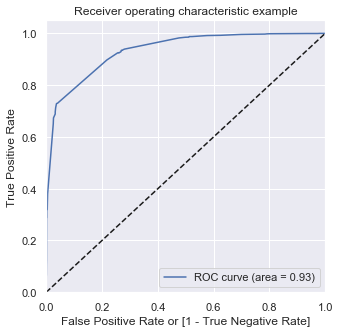

In [201]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [202]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000730,532,0,1,0,0,0,0,0,0,0,0,0
1,1,0.294760,7273,0,1,1,1,0,0,0,0,0,0,0
2,0,0.088131,4998,0,1,0,0,0,0,0,0,0,0,0
3,0,0.003652,6668,0,1,0,0,0,0,0,0,0,0,0
4,0,0.011518,2917,0,1,0,0,0,0,0,0,0,0,0


In [203]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378795  1.000000  0.000000
0.1   0.1  0.697694  0.982479  0.524038
0.2   0.2  0.808031  0.934297  0.731036
0.3   0.3  0.810353  0.925099  0.740385
0.4   0.4  0.874399  0.728866  0.963141
0.5   0.5  0.874564  0.728428  0.963675
0.6   0.6  0.872739  0.722295  0.964476
0.7   0.7  0.869753  0.711345  0.966346
0.8   0.8  0.862120  0.688568  0.967949
0.9   0.9  0.752613  0.354358  0.995459


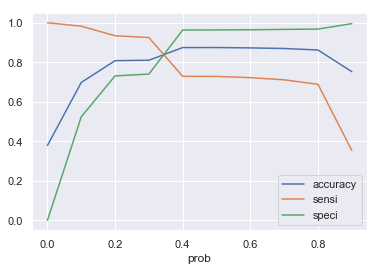

In [204]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, ~0.36 is the optimum point to take it as a cutoff probability.

In [205]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final['Converted_Prob'] = y_train_pred_final['Converted_Prob'] * 100
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.073043,532,0,1,0,0,0,0,0,0,0,0,0,0
1,1,29.475995,7273,0,1,1,1,0,0,0,0,0,0,0,0
2,0,8.813140,4998,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.365203,6668,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1.151772,2917,0,1,0,0,0,0,0,0,0,0,0,0


In [206]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8259498921519828

In [207]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2929,  815],
       [ 234, 2049]])

In [208]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [209]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.897503285151117

In [210]:
# Let us calculate specificity
TN / float(TN+FP)

0.7823183760683761

In [211]:
# Calculate false postive rate - predicting Convertable when Lead have not Converted.
print(FP/ float(TN+FP))

0.21768162393162394


In [212]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9260196016440089


## Precision and Recall

In [213]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3608,  136],
       [ 620, 1663]])

In [214]:
##### Precision

# TP / TP + FP

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7284275076653526

In [215]:
# Using SKlearn utilities.

from sklearn.metrics import precision_score, recall_score

In [216]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9244024458032241

In [217]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7284275076653526

### Making predictions on the test set

In [218]:
X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [219]:
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Last Activity_SMS Sent,How did you hear about X Education_SMS,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
376,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
8914,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7331,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
6344,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3783,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [220]:
X_test_sm = sm.add_constant(X_test)

In [221]:
# make predictions on test data.

y_test_pred = res.predict(X_test_sm)

In [222]:
y_test_pred[:10]

376     0.127586
8914    0.002938
7331    0.003652
6344    0.382240
3783    0.012772
4783    0.005975
3789    0.970083
185     0.003048
4116    0.987126
8622    0.992764
dtype: float64

In [223]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [224]:
# Let's see the head
y_pred_1.head()

,0
376,0.127586
8914,0.002938
7331,0.003652
6344,0.382240
3783,0.012772


In [225]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [226]:
# Putting CustID to index
y_test_df['Lead_ID'] = y_test_df.index

In [227]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [228]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [229]:
y_pred_final.head()

,Converted,Lead_ID,0
0,0,376,0.127586
1,0,8914,0.002938
2,0,7331,0.003652
3,1,6344,0.382240
4,0,3783,0.012772


In [230]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Lead_ID,Converted_Prob
0,0,376,0.127586
1,0,8914,0.002938
2,0,7331,0.003652
3,1,6344,0.382240
4,0,3783,0.012772


In [231]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [232]:
y_pred_final['Converted_Prob'] = y_pred_final['Converted_Prob'] * 100
y_pred_final.head()

,Converted,Lead_ID,Converted_Prob,final_predicted
0,0,376,12.758606,0
1,0,8914,0.293818,0
2,0,7331,0.365203,0
3,1,6344,38.223953,1
4,0,3783,1.277207,0


In [233]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8289473684210527

In [234]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1245,  331],
       [ 111,  897]])

In [235]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [236]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8898809523809523

In [237]:
# Calculate specificity.
TN / float(TN+FP)

0.7899746192893401

In [238]:
# Precision score.

precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7304560260586319

In [239]:
# Recall

recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8898809523809523

# Inferences:

### Model Evaluations:

Final model has following metrics which concludes to be good model.

    1. Precision_score        - 73.04%
    2. Sensitivity            - 88.98%
    3. Recall Score           - 88.90%
    4. Overall Accuracy score - 82.89%

**Hence this indicates the Target lead conversion rate to be around ~80%.**


Final Equation for our regression model has following variables with their co-efficients,

    1.Lead Origin_Lead Add Form	                             2.5047	
    2.Last Activity_SMS Sent	                             1.3378	
    3.How did you hear about X Education_SMS	            -2.5738	
    4.What is your current occupation_Unemployed	        -1.4643	
    5.What is your current occupation_Working Professional	 1.4184	
    6.Tags_Busy	                                             3.3369	
    7.Tags_Closed by Horizzon	                             9.1124	
    8.Tags_Lost to EINS	                                     9.2690	
    9.Tags_Ringing                                      	-1.2612	
    10.Tags_Will revert after reading the email	             3.8676	
    11.Tags_in touch with EINS	                             3.6336	
    12.Tags_switched off	                                -1.4311	
    13.Lead Profile_Potential Lead	                        -1.9370	
    14.Lead Profile_Student of SomeSchool	                -3.4164	
    15.Last Notable Activity_Modified	                    -1.4424	
    16.Last Notable Activity_Olark Chat Conversation	    -1.8566	
    17.Last Notable Activity_SMS Sent	                     1.1031	

The above list of data reveals the following Observations,


#### Positive Correlation features indicating probable lead conversions:

    1. Lead Origin with Lead Add form has positiive correlation with our target.
    2. If the last activity performed by customer was SMS(sent) then it could be a probable conversion.
    3. Working professionals can be probable conversions.
    4. Customer Tags having current status Tags_Closed by Horizzon & Tags_Lost to EINS are probable convertibles.
    5. Customer tag - Tags_Will revert after reading the email has higher probablity of conversion.
    6. Tags_in touch with EINS has positive correlation inidicating probable conversion.
    7. If Last Notable Activity_SMS Sent then it could be probable conversions.
    
#### Similarly negative correlation indicating that Marketing/Sales teams should ignore these variables which may not be helpful in conversion

    1. Customers who are un-employed are most likely to fail in conversion.
    2. Customer Tags having current status ringing or switched Off should be ignored.
    3. Lead profile with Student is probable failure conversion.
    4. Last Notable Activity Modified & Olark Chat Conversation are likely to fail.